In [1]:
import os
import torch
import clip
import torch.nn.functional as F
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
import numpy as np

%matplotlib inline

def show(img):
    npimg = img.numpy()
    plt.figure(figsize = (100,40))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

os.environ["CUDA_VISIBLE_DEVICES"]="1"
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [2]:
torch.cuda.is_available()

True

In [38]:
folder = "outputs/grateful-energy-30grateful-energy-30-40pt-this_colorful_bird_has_a_yellow_breast,_with_a_black_crown_and_a_black_cheek_patch/"
num_images = 32

In [39]:
def prepro(im):
    return preprocess(Image.open(f"{folder}{im}.jpg")).unsqueeze(0).to(device)
    #return t(Image.open(f"{folder}{im}.jpg")).unsqueeze(0).to(device)

In [46]:
images = torch.cat(tuple([prepro(x) for x in range(num_images)]))
image = F.interpolate(images, size=224)
caption = "this colorful bird has a yellow breast, with a black crown and a black cheek patch"
text = clip.tokenize("an image of a bird").to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    #print(logits_per_text)
    probs = logits_per_text.softmax(dim=-1).cpu().numpy()
print(np.mean(logits_per_text.cpu().numpy()))

27.38


In [47]:
t = transforms.ToTensor()
images = torch.stack(tuple([t(Image.open(f"{folder}{x}.jpg")) for x in range(num_images)]))
np_images = images.cpu().numpy()
scores = probs[0]

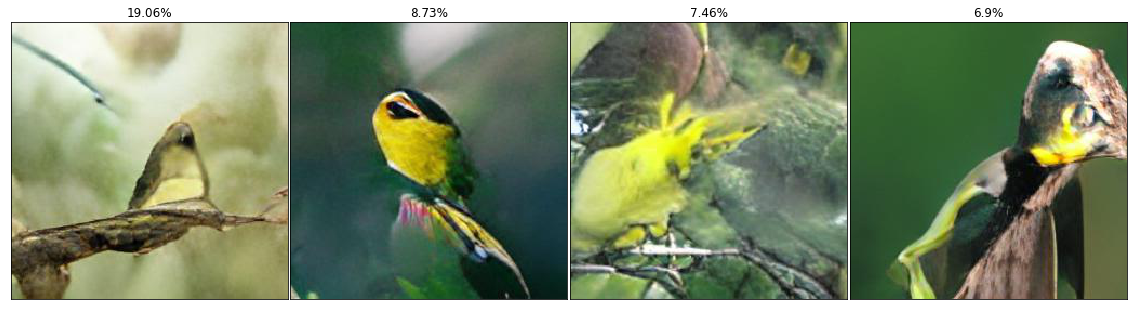

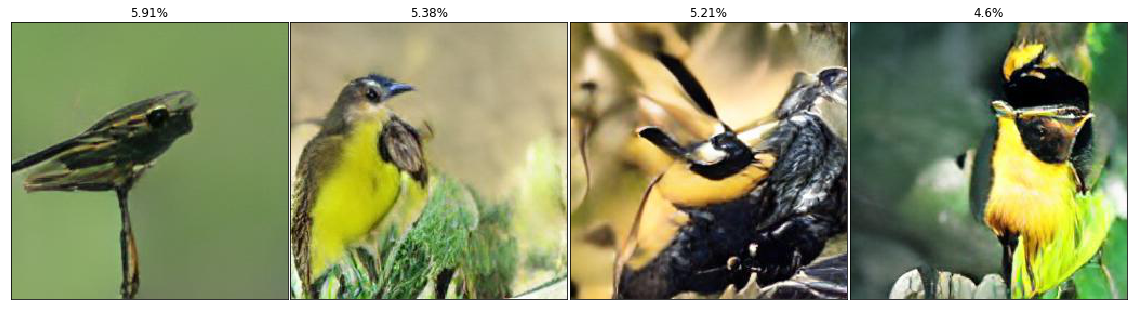

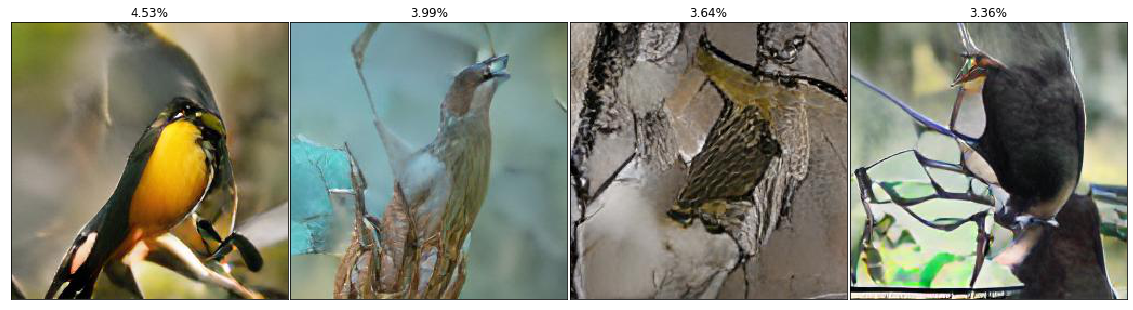

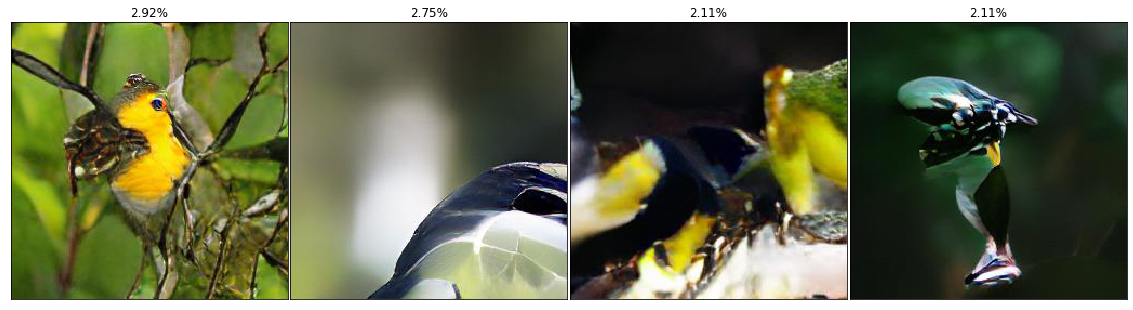

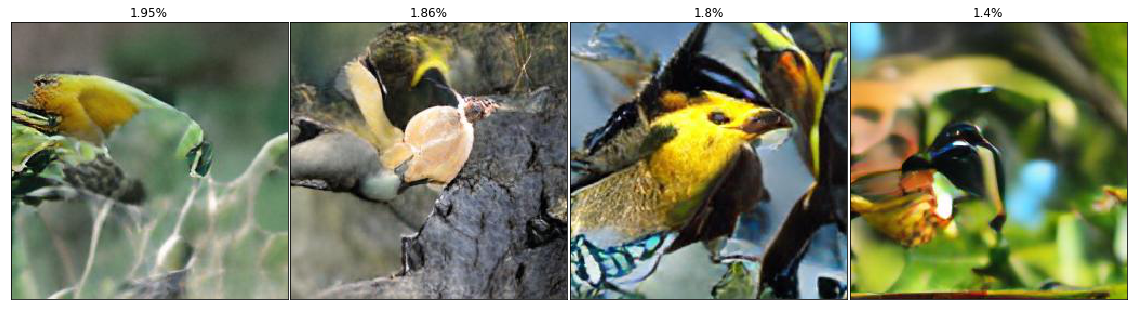

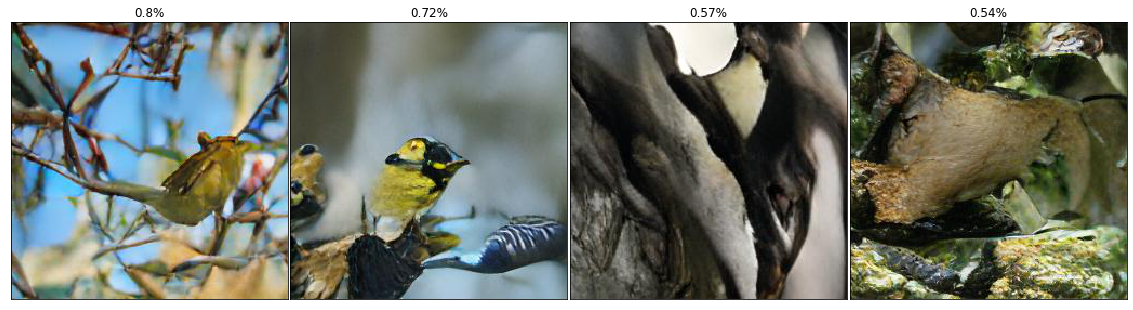

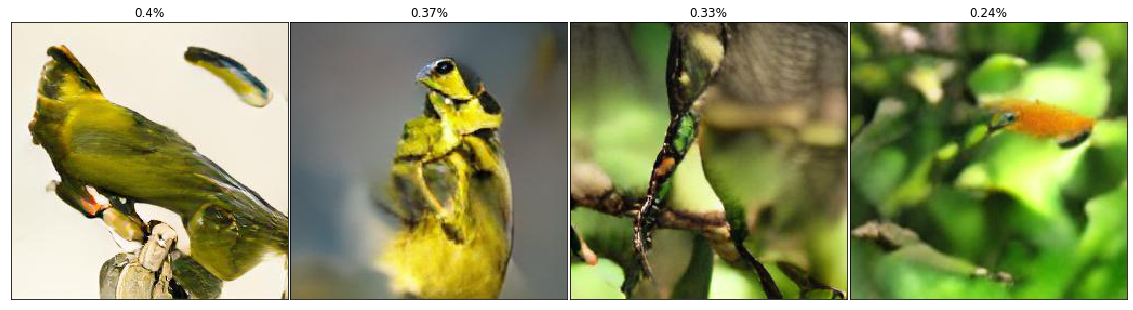

In [ ]:
def show_reranking(images, scores, sort=True):
    img_shape = images.shape
    if sort:
        scores_sort = scores.argsort()
        scores = scores[scores_sort[::-1]]
        images = images[scores_sort[::-1]]

    rows = 4
    cols = img_shape[0] // 4
    img_idx = 0

    for col in range(cols):
        fig, axs = plt.subplots(1, rows, figsize=(20,20))
        plt.subplots_adjust(wspace=0.01)
        for row in range(rows):
            tran_img = np.transpose(images[img_idx], (1,2,0))
            #tran_img = images[img_idx]
            axs[row].imshow(tran_img, interpolation='nearest')
            axs[row].set_title("{}%".format(np.around(scores[img_idx]*100, 2)))
            axs[row].set_xticks([])
            axs[row].set_yticks([])
            img_idx += 1

show_reranking(np_images, scores)